In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def read_img(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (400, 300))
    return img


def generate_C_array(img, threshold = 1, outputfile=False):
    flat = (img.flatten() > threshold)  # 转成1/0形式
    strs = "const char IMG0[] = {\n"
    for i in range(1500):
        strs += "    "
        for j in range(10):
            pxs = flat[i * 80 + j * 8: i * 80 + j * 8 + 8]
            value = 0
            for b in range(8):
                value += (not pxs[7-b]) << b
            strs += "%#.2x, " % (value)
        strs += "\n"
    strs += "};"
    
    strs = strs[:-5] + strs[-4:]  # 去掉最后一个逗号
    
    print(strs)
    
    if outputfile:
        with open('./模拟灰度的C数组代码.txt', 'w') as f:
            f.write(strs)
    return

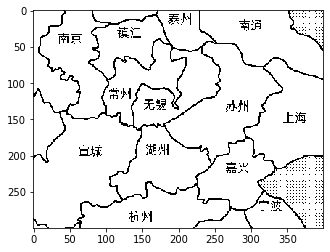

In [3]:
img2 = read_img("jzh-map.jpg")

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))
plt.show()

In [4]:
generate_C_array(img2, threshold = 205, outputfile=False)

const char IMG0[] = {
    0x00, 0x00, 0x00, 0x00, 0x00, 0x30, 0x00, 0x00, 0x00, 0x00, 
    0x60, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x18, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x06, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0xd1, 0x11, 0x11, 0x11, 0x11, 0x11, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 
    0x60, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x18, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x06, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0xc0, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x00, 
    0x60, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x18, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x06, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0xc4, 0x04, 0x04, 0x04, 0x04, 0x04, 
   